# Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
1. научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3. проанализировать основные признаки, наиболее сильно влияющие на отток;
4. сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
- выделить целевые группы клиентов;
- предложить меры по снижению оттока;
- определить другие особенности взаимодействия с клиентами.

## Подготовка данных

Загрузим данные и визуально оценим их.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
try:
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv(r'C:\Users\tktea\Downloads\gym_churn.csv')

display(df)
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Визуально, данные предоставленные для анализа в хорошем состоянии: нет пропущенных значений, формат подходит для работы алгоритмов машинного обучения. Проверим наличие дубликатов и посмотрим поближе что из себя представляют данные каждого столбца. 

In [3]:
df.duplicated().sum()

0

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Согласно выборке, среднестатистический клиент нашего фитнесс клуба 29-ти лет, живет или работает рядом, вероятно является сотрудником компании-партнера, оставил нам номер телефона, оплачивает фитнес помесячно, редко ходит на групповые занятия, пользуется дополнительными услугами клуба, занимается у нас уже 3 месяца, ходит в зал в 1-2 раза в неделю.

Дублей нет, большинство данных уже прошли нормализацию, а вот стандартизация лишней не будет.

Технические требования эти данные легко проходят, а вот с человеческой точки зрения есть вопросы: данные не так легко интерпритировать. Например, столбец gender содержит информацию о поле клиента, но в документации нет указаний какому полу принадлежат строки со значением 1, а какому со значением 0. Следует уточнить эту информацию у сотрудника, ответственного за выгрузку, а пока будем работать с теми данными, которые есть.

Из документации следует что столбец Churn содержит информацию о том остался пользователь нашим клиентом или ушел в отток. Посмотрим на данные сгруппированные по этому признаку.

In [5]:
df.groupby('Churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


После анализа таких столбцов как Lifetime (длительность пользования услугами нашего фитнесс клуба), Month_to_end_contract (срок до окончания текущего действующего абонемента (в месяцах)) и Avg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц) видно что в группе со значением Churn=0 они выше, значит можно сделать вывод что при значении Churn=0 клиент продолжил пользоваться абонементом, а при Churn=1 клиент ушел. 

Посмотрим визуально на данные каждого столбца с учетом разделения на оставшихся клиентов и ушедших.

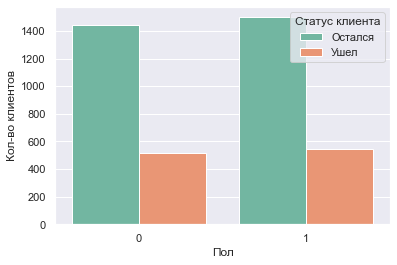

In [6]:
sns.set(style="darkgrid")
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.legend(labels=['Остался', 'Ушел'], title='Статус клиента')
plt.xlabel('Пол')
plt.ylabel('Кол-во клиентов');

По признаку gender данные разделились на равные половины.

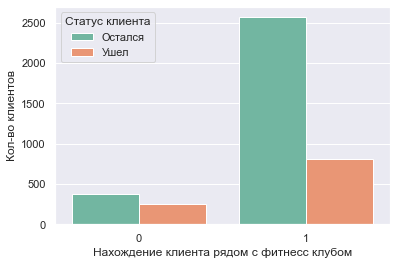

In [7]:
sns.countplot(x='Near_Location', hue='Churn', data=df, palette='Set2')
plt.legend(labels=['Остался', 'Ушел'], title='Статус клиента')
plt.xlabel('Нахождение клиента рядом с фитнесс клубом')
plt.ylabel('Кол-во клиентов');

В столбце Near_Location содержится информация о том, проживает или работает ли клиент в районе, где находится фитнес-центр или нет. Можно сказать наверняка что клиентам гораздо удобнее посещать фитнесс клуб, находящийся неподалеку, а значит и клиентов находящихся рядом должно быть больше и отток в случае нахождения поблизости будет меньше. Вывод - значение 0 - клиент не находится рядом с клубом, а 1 - клиент наш сосед.

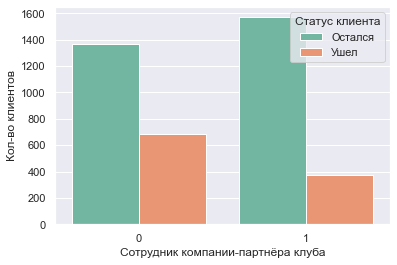

In [8]:
sns.countplot(x='Partner', hue='Churn', data=df, palette='Set2')
plt.legend(labels=['Остался', 'Ушел'], title='Статус клиента')
plt.xlabel('Сотрудник компании-партнёра клуба')
plt.ylabel('Кол-во клиентов');

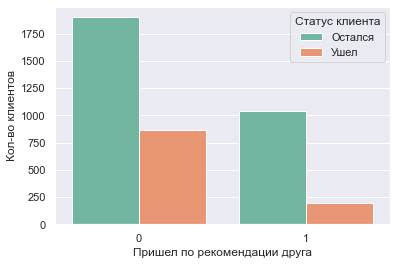

In [9]:
sns.countplot(x='Promo_friends', hue='Churn', data=df, palette='Set2')
plt.legend(labels=['Остался', 'Ушел'], title='Статус клиента')
plt.xlabel('Пришел по рекомендации друга')
plt.ylabel('Кол-во клиентов');

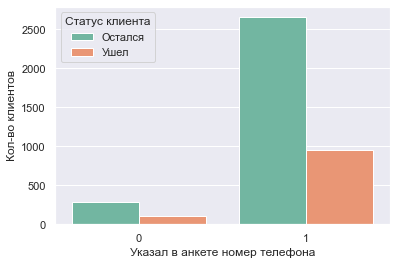

In [10]:
sns.countplot(x='Phone', hue='Churn', data=df, palette='Set2')
plt.legend(labels=['Остался', 'Ушел'], title='Статус клиента')
plt.xlabel('Указал в анкете номер телефона')
plt.ylabel('Кол-во клиентов');

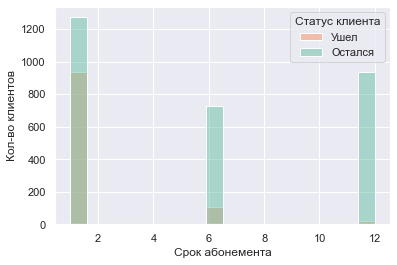

In [11]:
sns.histplot(data=df, x='Contract_period', hue='Churn', palette='Set2')
plt.legend(labels=['Ушел', 'Остался'], title='Статус клиента')
plt.xlabel('Срок абонемента')
plt.ylabel('Кол-во клиентов');

Столбец Contract_period содержит данные о длительности текущего действующего абонемента (месяц, 6 месяцев, год). Из них следует что максимальный отток наблюдается если клиент приобретает абонемент на 1 месяц, а минимальный - при оформлении абонемента на год.

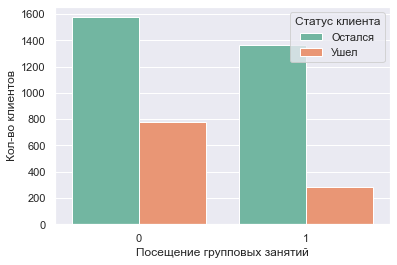

In [12]:
sns.countplot(x='Group_visits', hue='Churn', data=df, palette='Set2')
plt.legend(labels=['Остался', 'Ушел'], title='Статус клиента')
plt.xlabel('Посещение групповых занятий')
plt.ylabel('Кол-во клиентов');

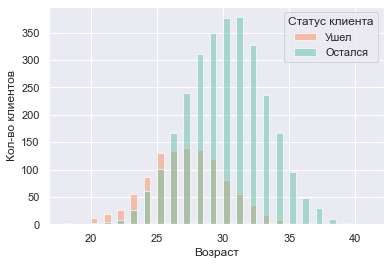

In [13]:
sns.histplot(data=df, x='Age', hue='Churn', palette='Set2')
plt.legend(labels=['Ушел', 'Остался'], title='Статус клиента')
plt.xlabel('Возраст')
plt.ylabel('Кол-во клиентов');

Еще один интересный столбец - Age содержит данные о возрасте клиентов. Данные говорят о том что средний вораст клиентов, продолживших посещения клуба, выше чет тех кто прекратил занятия.

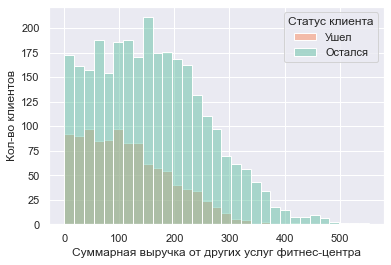

In [14]:
sns.histplot(data=df, x='Avg_additional_charges_total', hue='Churn', palette='Set2')
plt.legend(labels=['Ушел', 'Остался'], title='Статус клиента')
plt.xlabel('Суммарная выручка от других услуг фитнес-центра')
plt.ylabel('Кол-во клиентов');

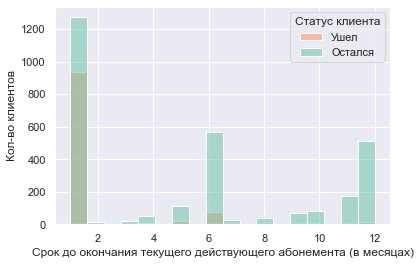

In [15]:
sns.histplot(data=df, x='Month_to_end_contract', hue='Churn', palette='Set2')
plt.legend(labels=['Ушел', 'Остался'], title='Статус клиента')
plt.xlabel('Срок до окончания текущего действующего абонемента (в месяцах)')
plt.ylabel('Кол-во клиентов');

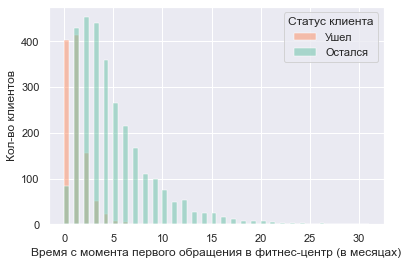

In [16]:
sns.histplot(data=df, x='Lifetime', hue='Churn', palette='Set2')
plt.legend(labels=['Ушел', 'Остался'], title='Статус клиента')
plt.xlabel('Время с момента первого обращения в фитнес-центр (в месяцах)')
plt.ylabel('Кол-во клиентов');

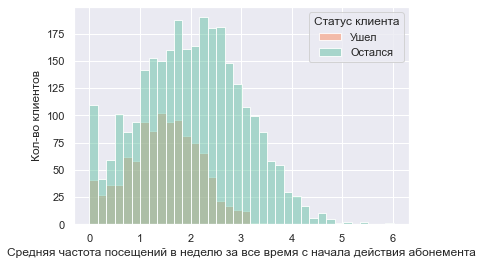

In [17]:
sns.histplot(data=df, x='Avg_class_frequency_total', hue='Churn', palette='Set2')
plt.legend(labels=['Ушел', 'Остался'], title='Статус клиента')
plt.xlabel('Средняя частота посещений в неделю за все время с начала действия абонемента')
plt.ylabel('Кол-во клиентов');

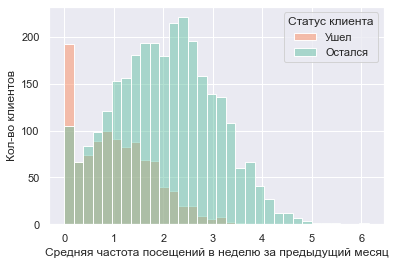

In [18]:
sns.histplot(data=df, x='Avg_class_frequency_current_month', hue='Churn', palette='Set2')
plt.legend(labels=['Ушел', 'Остался'], title='Статус клиента')
plt.xlabel('Средняя частота посещений в неделю за предыдущий месяц')
plt.ylabel('Кол-во клиентов');

Посмотрим на корреляцию признаков между собой.

In [19]:
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


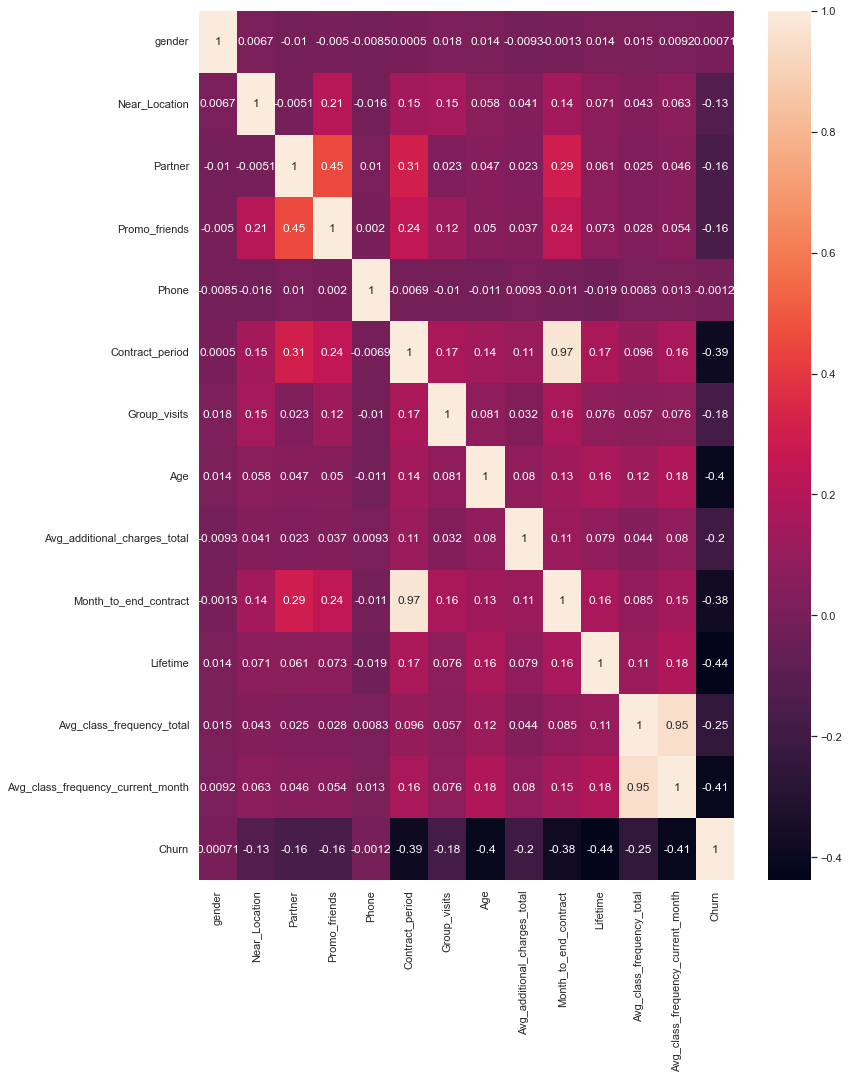

In [20]:
fig, ax = plt.subplots(figsize=(12,16))
sns.heatmap(df.corr(), annot=True, ax=ax);

В данных присутствуют 2 пары сильно скоррелированных признаков: 'Contract_period' и 'Month_to_end_contract', 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month'. Корреляции этих признаков логичны, они не несут угрозу решения будущих задач классификации и кластеризации, удаление признаков не требуется.

## Построение модели прогнозирования оттока клиентов

Построим модели используя 2 алгоритма (логистической регрессии и случайный лес) и проверим какой из них показал лучшие результаты.

In [21]:
# разделим наши данные на признаки (матрица x) и целевую переменную (y)
x = df.drop(columns=['Churn'])
y = df['Churn']

# разделяем модель на обучающую и валидационную выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

In [22]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
x_train_st = scaler.fit_transform(
    x_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
x_test_st = scaler.transform(x_test)

In [23]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [24]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(x_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(x_test_st)
lr_probabilities = lr_model.predict_proba(x_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

print()

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(x_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(x_test_st) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(x_test_st)[:, 1] # Ваш код здесь
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


Модели показали очень похожие результаты, но модель логической регрессии показала себя немного лучше чем случайный лес.

## Кластеризация.

Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов).

In [25]:
#стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
x_sc = sc.fit_transform(x)

#чтобы диаграмма получилась показательной, лучше передать параметру method значение 'ward'
linked = linkage(x_sc, method = 'ward')

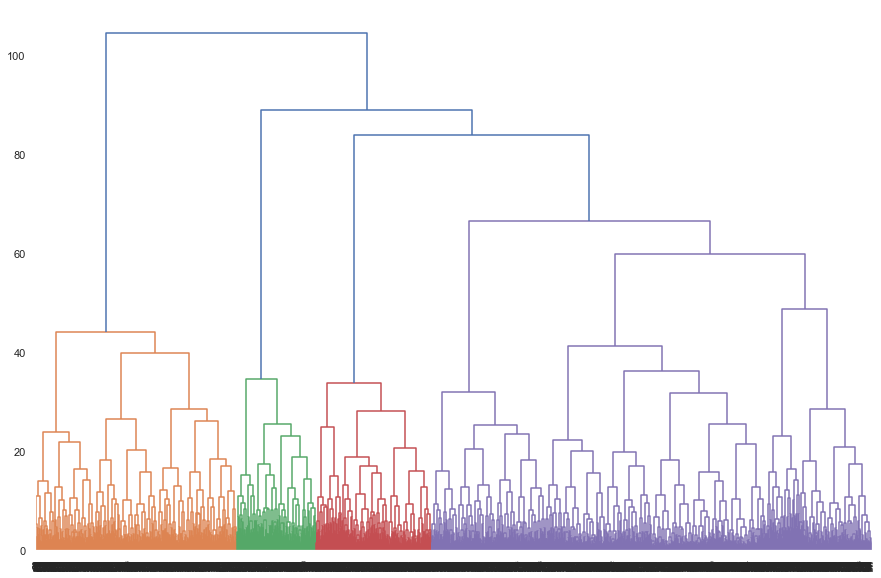

In [26]:
#построим дендрограму для определения оптимального числа кластеров
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Согласно дендрограме, выборку будет оптимально поделить на 5 кластеров.

In [27]:
# задаём число кластеров равное 5, делим имеющуюся выборку на кластеры
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(x_sc)

#добавим ярлыки с номерами кластеров в исходную таблицу
df['cluster_km'] = labels
display(df['cluster_km'].value_counts())
display(df.head())

3    1262
0    1010
4     838
2     505
1     385
Name: cluster_km, dtype: int64

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


C:\Users\tktea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


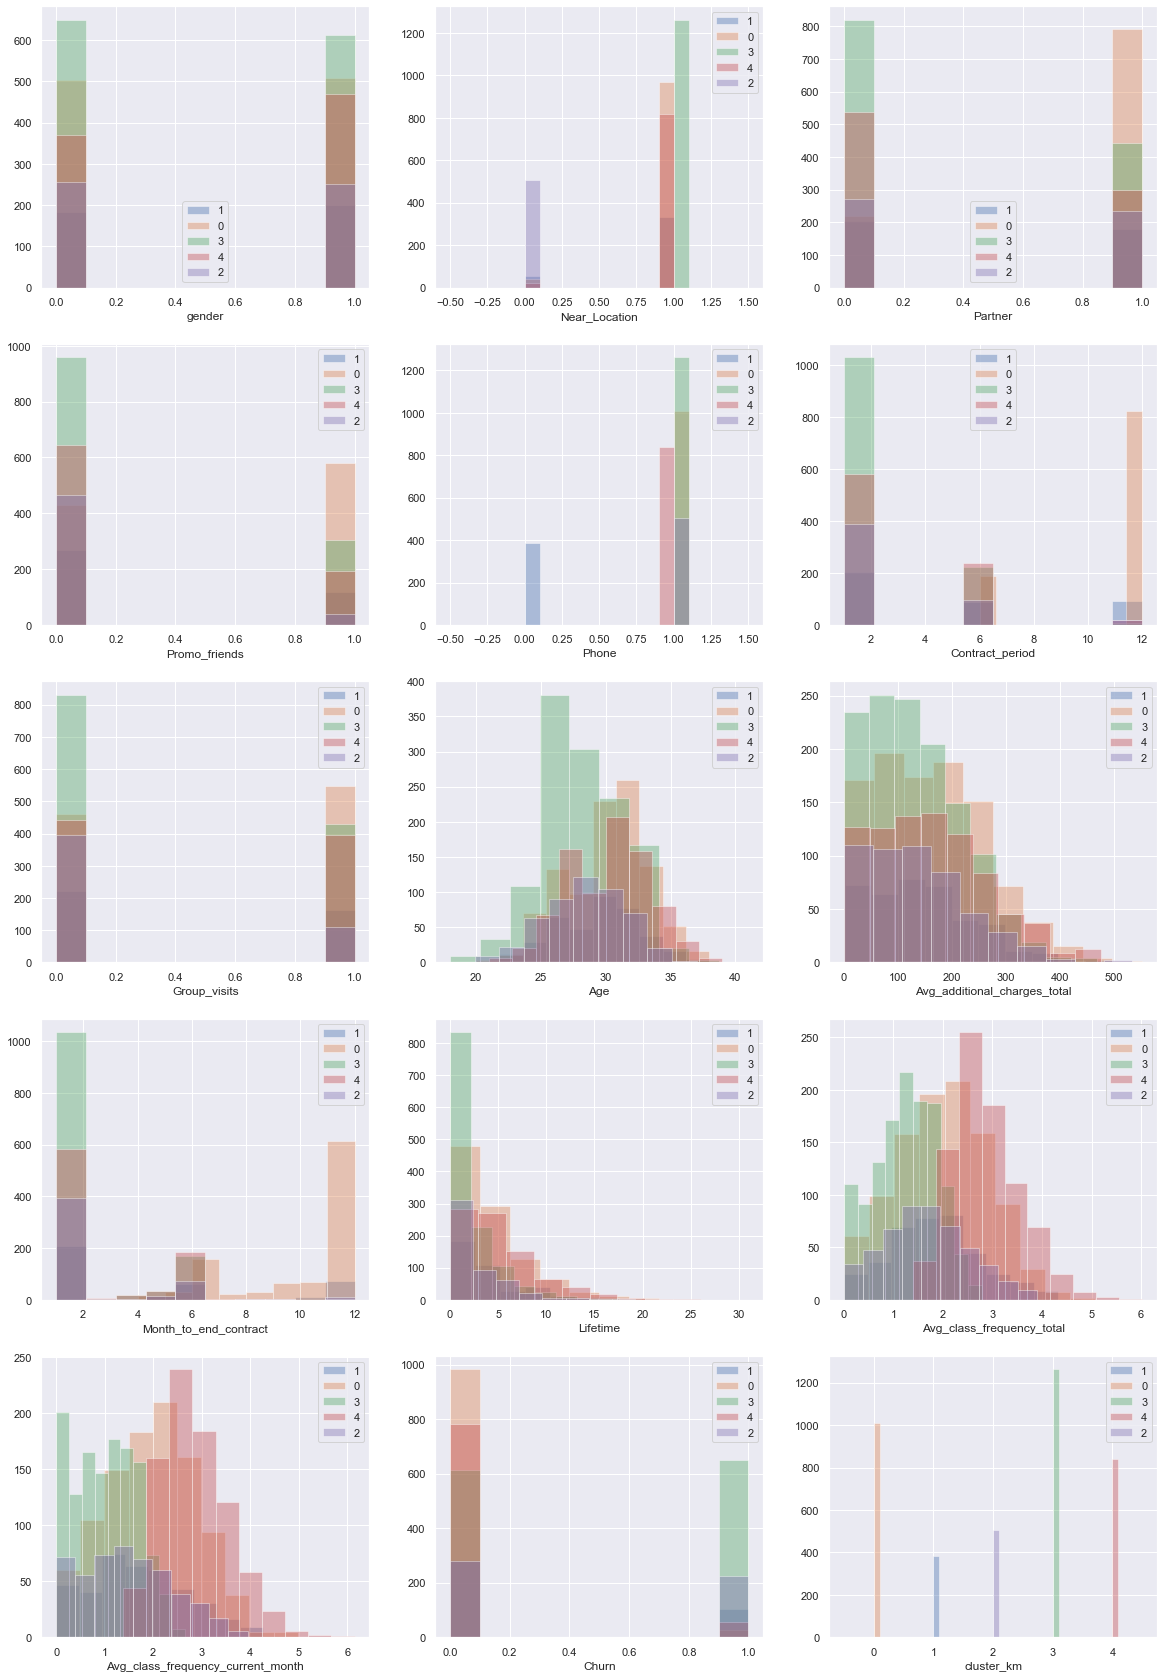

In [28]:
# строим гистограммы распределения признаков по кластерам
 
fig, axes = plt.subplots(5,3)
fig.set_size_inches(20, 30)
axes = axes.ravel()
i = 0
for column in df:
    for cluster in df['cluster_km'].unique():
        sns.distplot(df[df['cluster_km'] == cluster][column], bins=10, kde=False, ax = axes[i]\
                     , label= cluster)
        axes[i].legend()
    i+=1
 
 
plt.show()

Не очень наглядно, построим дополнительные графики.

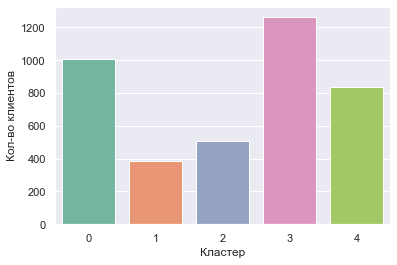

In [29]:
sns.countplot(data = df, x = 'cluster_km', palette='Set2')
plt.xlabel('Кластер')
plt.ylabel('Кол-во клиентов');

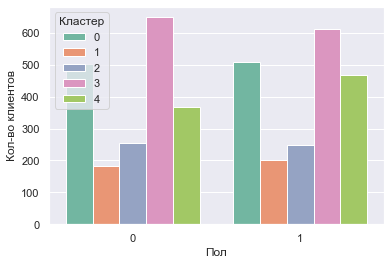

In [30]:
sns.countplot(data = df, x = 'gender', hue = 'cluster_km', palette='Set2')
plt.legend(title='Кластер')
plt.xlabel('Пол')
plt.ylabel('Кол-во клиентов');

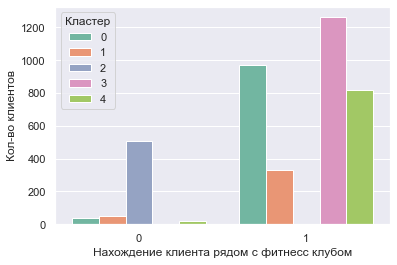

In [31]:
sns.countplot(data = df, x = 'Near_Location', hue = 'cluster_km', palette='Set2')
plt.legend(title='Кластер')
plt.xlabel('Нахождение клиента рядом с фитнесс клубом')
plt.ylabel('Кол-во клиентов');

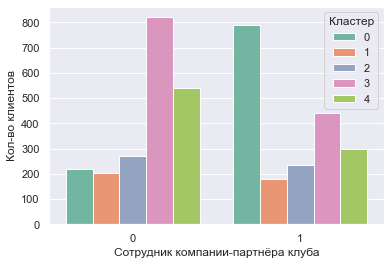

In [32]:
sns.countplot(data = df, x = 'Partner', hue = 'cluster_km', palette='Set2')
plt.legend(title='Кластер')
plt.xlabel('Сотрудник компании-партнёра клуба')
plt.ylabel('Кол-во клиентов');

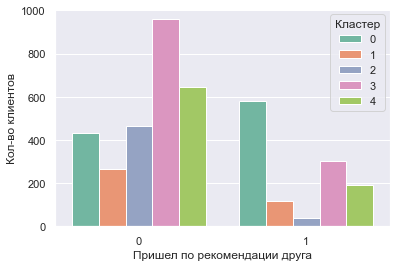

In [33]:
sns.countplot(data = df, x = 'Promo_friends', hue = 'cluster_km', palette='Set2')
plt.legend(title='Кластер')
plt.xlabel('Пришел по рекомендации друга')
plt.ylabel('Кол-во клиентов');

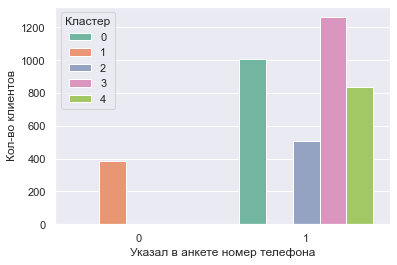

In [34]:
sns.countplot(data = df, x = 'Phone', hue = 'cluster_km', palette='Set2')
plt.legend(title='Кластер')
plt.xlabel('Указал в анкете номер телефона')
plt.ylabel('Кол-во клиентов');

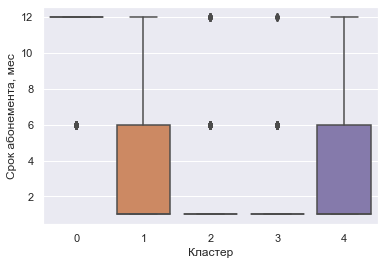

In [35]:
sns.boxplot(x ='cluster_km', y = 'Contract_period', data = df)
plt.xlabel('Кластер')
plt.ylabel('Срок абонемента, мес');

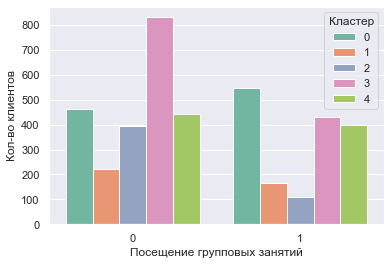

In [36]:
sns.countplot(data = df, x = 'Group_visits', hue = 'cluster_km', palette='Set2')
plt.legend(title='Кластер')
plt.xlabel('Посещение групповых занятий')
plt.ylabel('Кол-во клиентов');

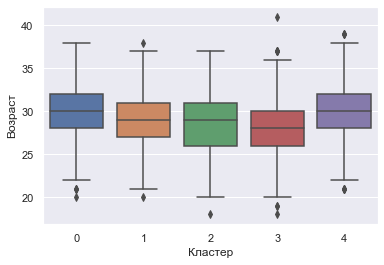

In [37]:
sns.boxplot(x ='cluster_km', y = 'Age', data = df)
plt.xlabel('Кластер')
plt.ylabel('Возраст');

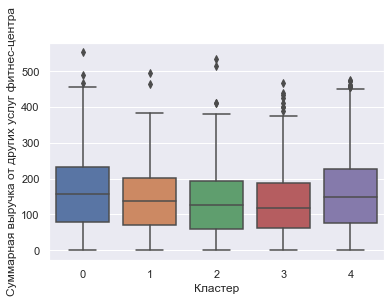

In [38]:
sns.boxplot(x ='cluster_km', y = 'Avg_additional_charges_total', data = df)
plt.xlabel('Кластер')
plt.ylabel('Суммарная выручка от других услуг фитнес-центра');

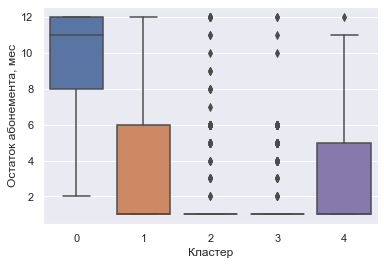

In [39]:
sns.boxplot(x ='cluster_km', y = 'Month_to_end_contract', data = df)
plt.xlabel('Кластер')
plt.ylabel('Остаток абонемента, мес');

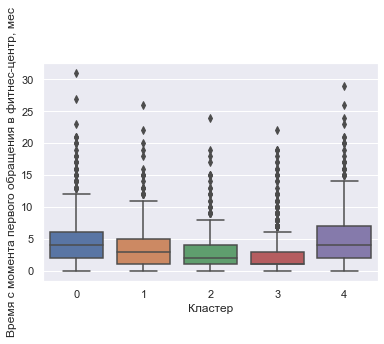

In [40]:
sns.boxplot(x ='cluster_km', y = 'Lifetime', data = df)
plt.xlabel('Кластер')
plt.ylabel('Время с момента первого обращения в фитнес-центр, мес');

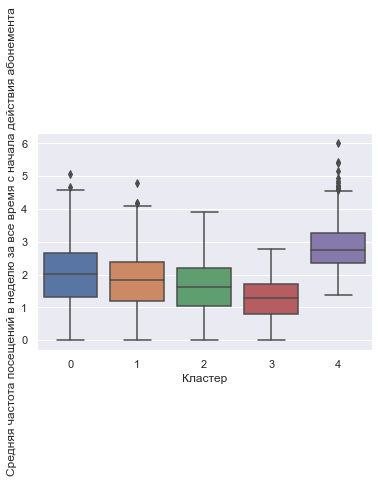

In [41]:
sns.boxplot(x ='cluster_km', y = 'Avg_class_frequency_total', data = df)
plt.xlabel('Кластер')
plt.ylabel('Средняя частота посещений в неделю за все время с начала действия абонемента');

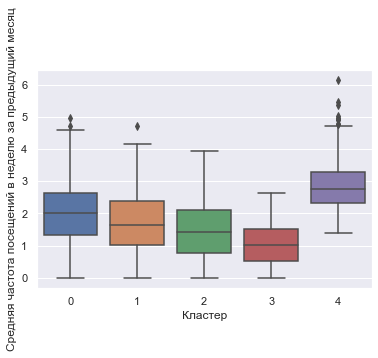

In [42]:
sns.boxplot(x ='cluster_km', y = 'Avg_class_frequency_current_month', data = df)
plt.xlabel('Кластер')
plt.ylabel('Средняя частота посещений в неделю за предыдущий месяц');

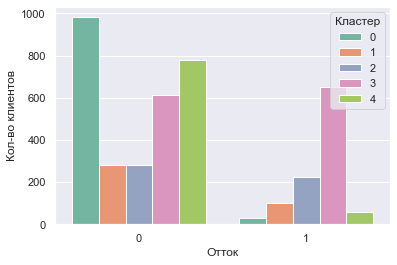

In [43]:
sns.countplot(data = df, x = 'Churn', hue = 'cluster_km', palette='Set2')
plt.legend(title='Кластер')
plt.xlabel('Отток')
plt.ylabel('Кол-во клиентов');

In [44]:
df.groupby('cluster_km').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Кластеризация разделила выборку на 5 групп. Проанализируем каждый кластер:
- Кластер 0. Большая часть клиентов из этого кластера находится недалеко от клуба, являются сотрудниками компании-партнера, почти наверняка пришли по рекомендации, оформили абонемент на длительный срок (минимум на 6 месяцев, а чаще на 12) и имеют самый большой срок до окончания абонемента, стабильно ходят в фитнес клуб 2 раза в неделю и регулярно приобретают дополнительные услуги клуба. Кластер показывает низкий уровень оттока, всего лишь 2% оттока.
- Кластер 1. Клиенты данного кластера также скорее живут или работают рядом с клубом, нередко приходят по рекомендации друзей, чаще оформляют абонемент на 6 месяцев, имеют средние траты на дополнительные услуги клуба, стараются ходить в зал 2 раза в неделю и не оставляют номер телефона (!). Данный кластер показывает средний отток - 26%. 
- Кластер 2. Среднего клиента из этого кластера характеризует то, что он находится не рядом с клубом, приобрел абонемент на короткий срок (чаще с помесячной оплатой, но иногда на пол года), реже всего посещает групповые занятия (неудивительно, ведь клуб находится не рядом), посещает зал 1-2 раза в месяц. Кластер имеет высокий уровень оттока - 44%.
- Кластер 3. Данный кластер можно назвать "оттекающим". Клиенты входящие в данный кластер самые молодые (средний возраст 28 лет), приобретают абонементы на самый маленький срок, тратят меньше всех на дополнительные услуги и реже всех занимаются фитнесом (только 1 раз в неделю). Отток по этому кластеру - 51%.
- Кластер 4. Этот кластер имеет самый высокий средний возраст - более 30 лет. Также, клиенты данного кластера приобретают абонементы на короткий срок (1-6 месяцев), больше всех тратят на доп услуги клуба, дольше всех являются нашими клиентами, и чаще всех ходят на занятия (целых 3 раза в неделю!). Данный кластер показывает низкий отток - 6%



## Выводы и базовые рекомендации по работе с клиентами

После анализа предоставленных данных, формирования на их основе графиков и отработки моделей машинного обучения можно порекомендовать следующие шаги для уменьшения оттока:
- Изменения стратегии оформления абонементов, максимизация предложения абонементов на более длительные срок (дополнительная скидка при оформлении абонемента на год, бесплатное включение платных процедур в абонемент на год и т.д.)
- Введение поощрения клиентов продливающие абонемент, дополнительный бонус при досрочном продлении (+1 месяц занятий при продлении, например)
- Реализация маркетинговой кампании в соответствии с целевой аудиторией (фокусировка на потенциальных клиентах в возрасте около 30 живущих или работающих рядом с фитнесс клубом )